**Importing libs**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

matplotlib.rcParams['figure.figsize'] = [16, 4]
pd.set_option('display.max_columns', 100)

**Bringing CSV**

In [52]:
df = pd.read_csv('dfTimeSeries_Example1.csv')

In [53]:
df.head(3)

,dept_id,state_id,cat_id,d,date,event_name_1,event_type_1,value_sales,sell_price
0,FOODS_1,CA,FOODS,d_1,2011-01-29,NaN,NaN,297,2.989109
1,FOODS_1,CA,FOODS,d_10,2011-02-07,NaN,NaN,176,3.016636
2,FOODS_1,CA,FOODS,d_100,2011-05-08,Mother's day,Cultural,211,2.987851


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13391 entries, 0 to 13390
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dept_id       13391 non-null  object 
 1   state_id      13391 non-null  object 
 2   cat_id        13391 non-null  object 
 3   d             13391 non-null  object 
 4   date          13391 non-null  object 
 5   event_name_1  1078 non-null   object 
 6   event_type_1  1078 non-null   object 
 7   value_sales   13391 non-null  int64  
 8   sell_price    13391 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 941.7+ KB


**Converting to Datetime**

In [55]:
df['date'] = pd.to_datetime(df.date)
df = df[df['date'] >= '2014-01-01']

In [56]:
print(df.dept_id.unique())
lista_itens = df.dept_id.unique()

#Filtering just one series
df_item1 = df.loc[df['dept_id'] == 'HOBBIES_1', : ]
#Put the Index as the date
df_item1.index = df_item1.date
df_item2 = df.loc[df['dept_id'] == 'HOUSEHOLD_1', :].set_index('date')

df_item1.head()

print(df_item1.shape)
print(df.shape)

['FOODS_1' 'FOODS_2' 'FOODS_3' 'HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1'
 'HOUSEHOLD_2']
(845, 9)
(5915, 9)


**Visualizing value sales with a plot**

<Axes: xlabel='date'>

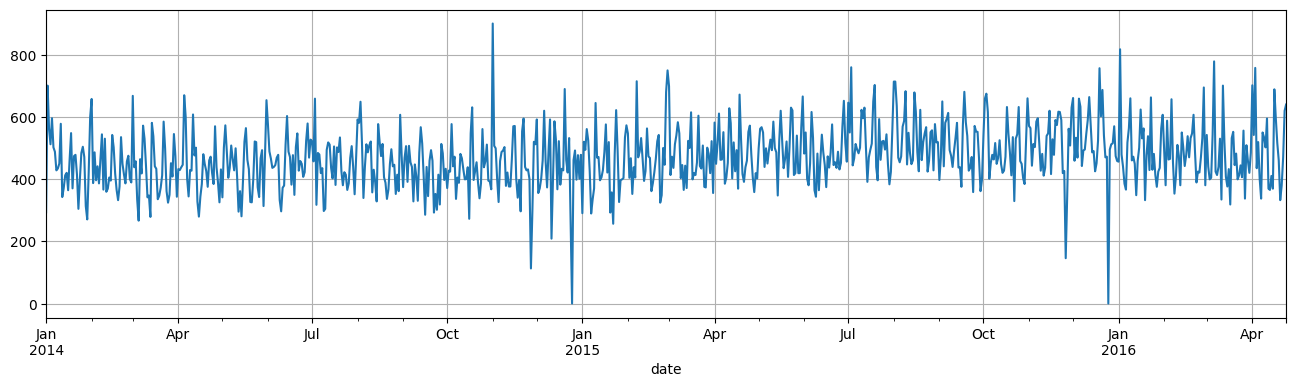

In [57]:
df_item1['value_sales'].plot(grid = True)

<Axes: xlabel='date'>

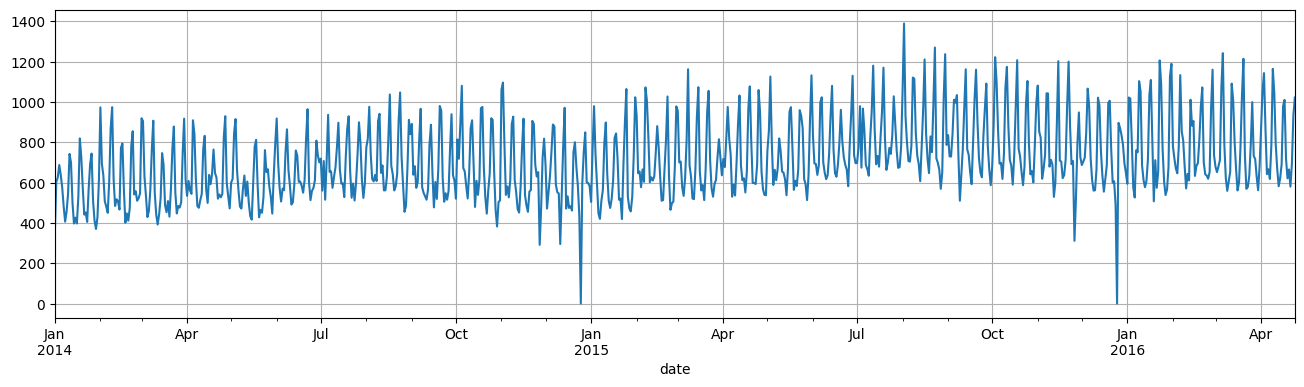

In [58]:
df_item2['value_sales'].plot(grid = True)

**First concept – Correlation between two series**

Sales correlation between the two series:  67.0 %


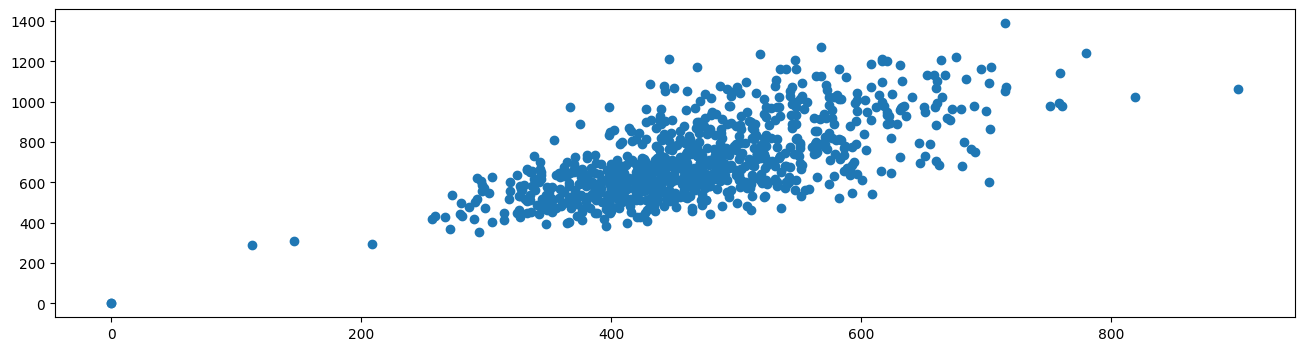

In [59]:
correlation = df_item1['value_sales'].corr(df_item2['value_sales'])
print("Sales correlation between the two series: ", np.round(correlation*100), "%" )
plt.scatter(df_item1['value_sales'], df_item2['value_sales'])
plt.show()

In [60]:
diffs_dfitem1 = df_item1.loc[:,['value_sales']].diff().dropna()
diffs_dfitem1 = diffs_dfitem1[diffs_dfitem1['value_sales'] < float('inf') ]

diffs_dfitem2 = df_item2.loc[:,['value_sales']].diff().dropna()
diffs_dfitem2 = diffs_dfitem2[diffs_dfitem2['value_sales'] < float('inf') ]

In [61]:
correlation = diffs_dfitem1['value_sales'].corr(diffs_dfitem2['value_sales'])
print("Sales correlation between the differences of the two series: ", np.round(correlation*100), "%" )

Sales correlation between the differences of the two series:  53.0 %


**Second concept - Autocorrelation and Partial Autocorrelation**

In [62]:
#Lag 1 = Yesterday's sale
df_item1.loc[:,'lag1_sales'] = df_item1.value_sales.shift(1)
df_item1.loc[:,['dept_id','value_sales','lag1_sales']].head(5)

<ipython-input-62-e8f78cad0512>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item1.loc[:,'lag1_sales'] = df_item1.value_sales.shift(1)


,dept_id,value_sales,lag1_sales
date,,,
2014-01-01,HOBBIES_1,294,NaN
2014-01-02,HOBBIES_1,702,294.0
2014-01-03,HOBBIES_1,565,702.0
2014-01-04,HOBBIES_1,513,565.0
2014-01-05,HOBBIES_1,597,513.0


In [63]:
autocorrelation = df_item2['value_sales'].autocorr()

print("The autocorrelation of daily sales with lag 1 is " + str(np.round(autocorrelation*100)) + "%")

The autocorrelation of daily sales with lag 1 is 54.0%


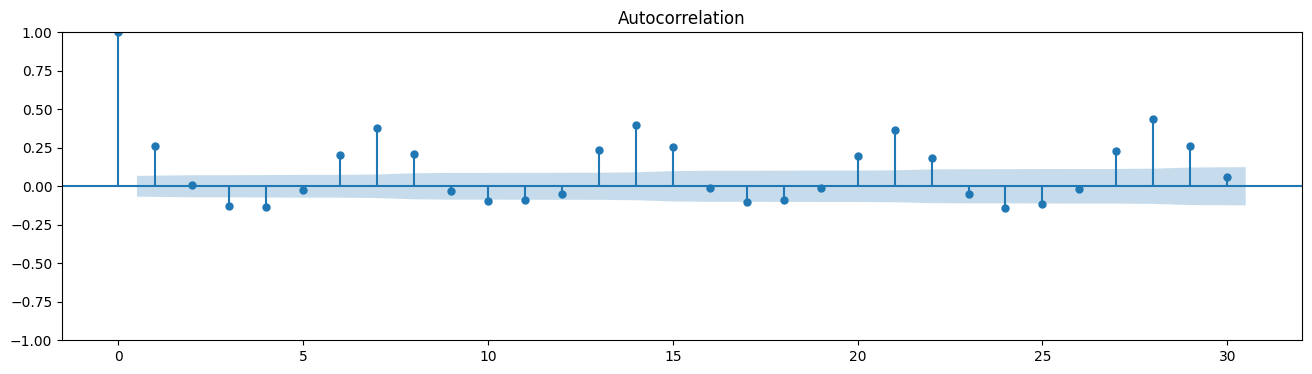

In [64]:
plot_acf(df_item1['value_sales'], alpha = 0.05);

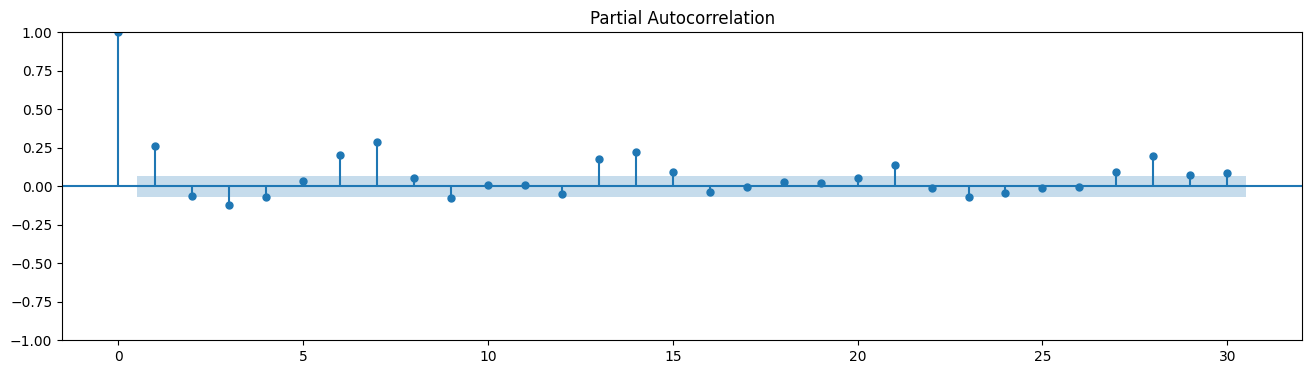

In [65]:
plot_pacf(df_item1['value_sales'], alpha = 0.05);

**Third concept - Unpredictable series (White-Noise and Random-Walk)**

<Figure size 1600x400 with 0 Axes>

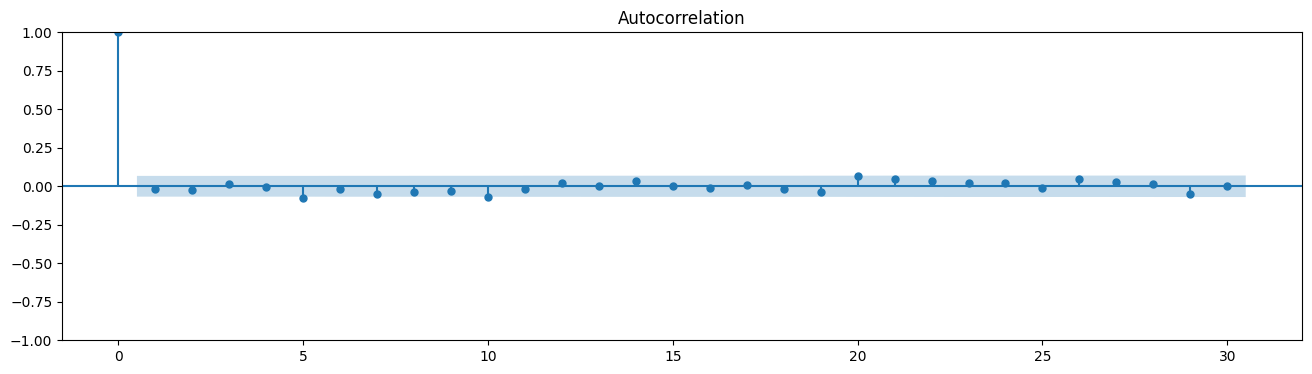

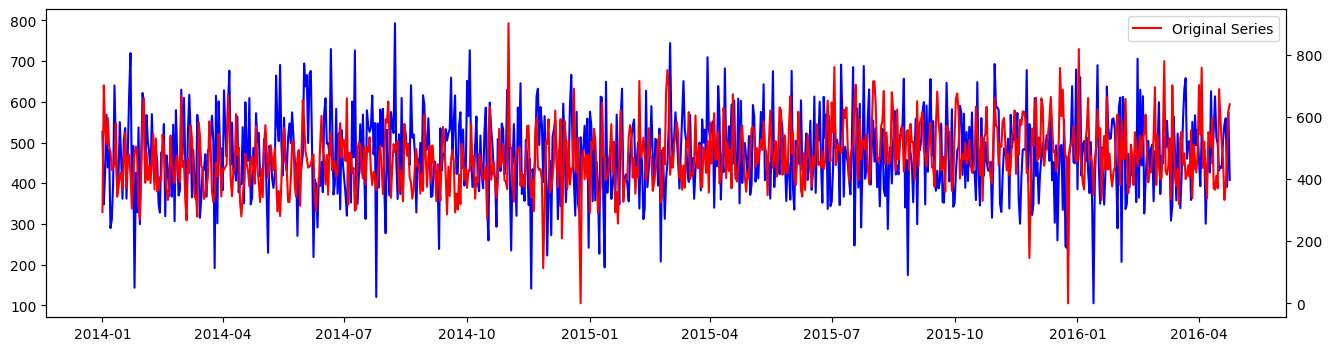

In [66]:
#Series 1 mean and standard deviation
mean_item1 = df_item1['value_sales'].mean()
std_item1 = df_item1['value_sales'].std()
noise = np.random.normal(mean_item1, std_item1, df_item1.shape[0])
plt.clf()
plot_acf(noise)

#The two series on the graph - Noise and Original Series
fig, ax = plt.subplots()
ax.plot(df_item1.index, noise, color='blue')
ax2 = ax.twinx()
ax2.plot(df_item1.index, df_item1["value_sales"], color='red',label='Original Series')
plt.legend()
plt.show()

**Fourth concept - Stationarity**

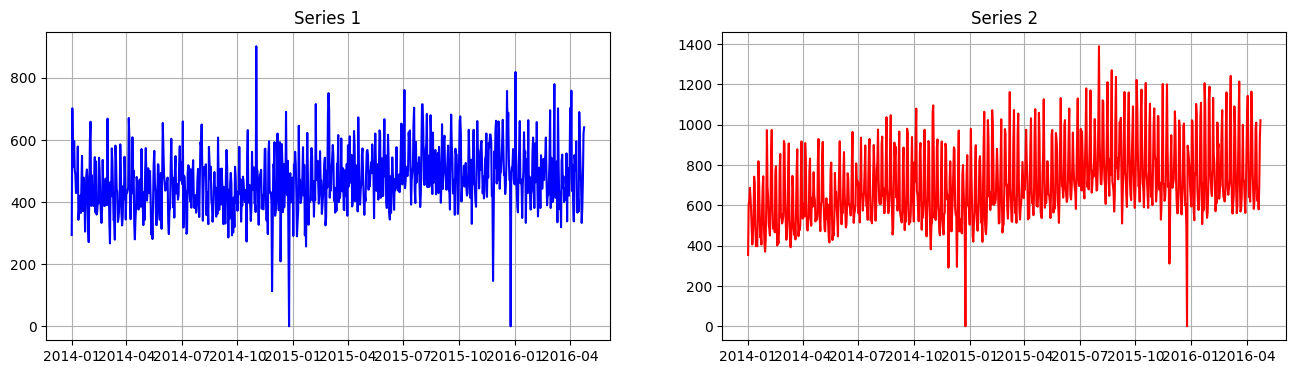

In [67]:
fig, ax = plt.subplots(1,2)
ax[0].plot(df_item1.index, df_item1.value_sales, color='blue')
ax[0].grid()
ax[0].set_title("Series 1")

ax[1].plot(df_item2.index, df_item2.value_sales, color='red')
ax[1].grid()
ax[1].set_title("Series 2")

plt.show()

In [68]:
adfuller_serie_1 = adfuller(df_item1.value_sales)
adfuller_serie_2 = adfuller(df_item2.value_sales)
print('p-value of the Augmented Dickey-Fuller Test for series 1: {0:.2f}'.format(np.round(adfuller_serie_1[1],2)))
print('p-value of the Augmented Dickey-Fuller Test for series 2: {0:.2f}'.format(np.round(adfuller_serie_2[1],2)))

p-value of the Augmented Dickey-Fuller Test for series 1: 0.06
p-value of the Augmented Dickey-Fuller Test for series 2: 0.26


In [69]:
df_item1.loc[:,'diff_sales'] = df_item1.loc[:,'value_sales'].diff()
df_item2.loc[:,'diff_sales'] = df_item2.loc[:,'value_sales'].diff()

df_item1.head()

<ipython-input-69-034c7d1bfc52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item1.loc[:,'diff_sales'] = df_item1.loc[:,'value_sales'].diff()


,dept_id,state_id,cat_id,d,date,event_name_1,event_type_1,value_sales,sell_price,lag1_sales,diff_sales
date,,,,,,,,,,,
2014-01-01,HOBBIES_1,CA,HOBBIES,d_1069,2014-01-01,NewYear,National,294,6.333581,NaN,NaN
2014-01-02,HOBBIES_1,CA,HOBBIES,d_1070,2014-01-02,NaN,NaN,702,6.333581,294.0,408.0
2014-01-03,HOBBIES_1,CA,HOBBIES,d_1071,2014-01-03,NaN,NaN,565,6.333581,702.0,-137.0
2014-01-04,HOBBIES_1,CA,HOBBIES,d_1072,2014-01-04,NaN,NaN,513,6.380265,565.0,-52.0
2014-01-05,HOBBIES_1,CA,HOBBIES,d_1073,2014-01-05,NaN,NaN,597,6.380265,513.0,84.0


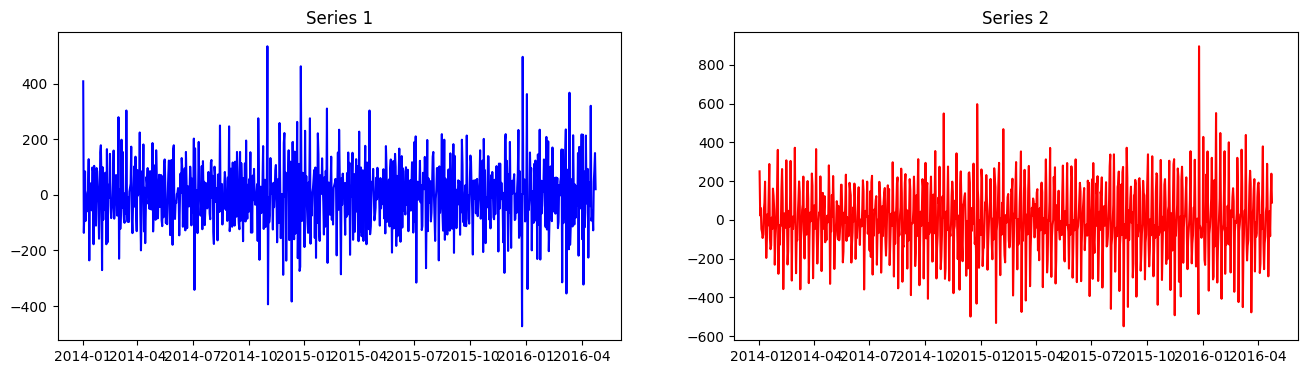

p-value of the Augmented Dickey-Fuller Test for series 1: 0.00
p-value of the Augmented Dickey-Fuller Test for series 2: 0.00


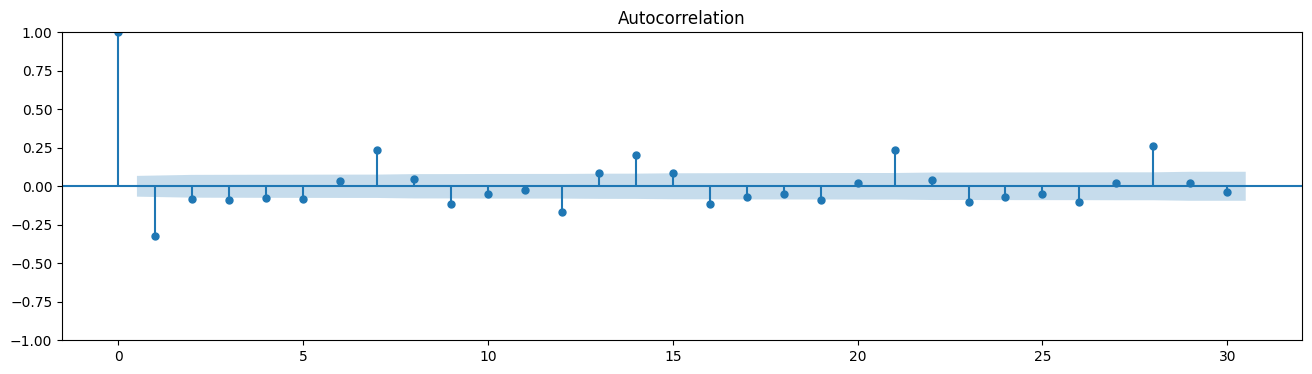

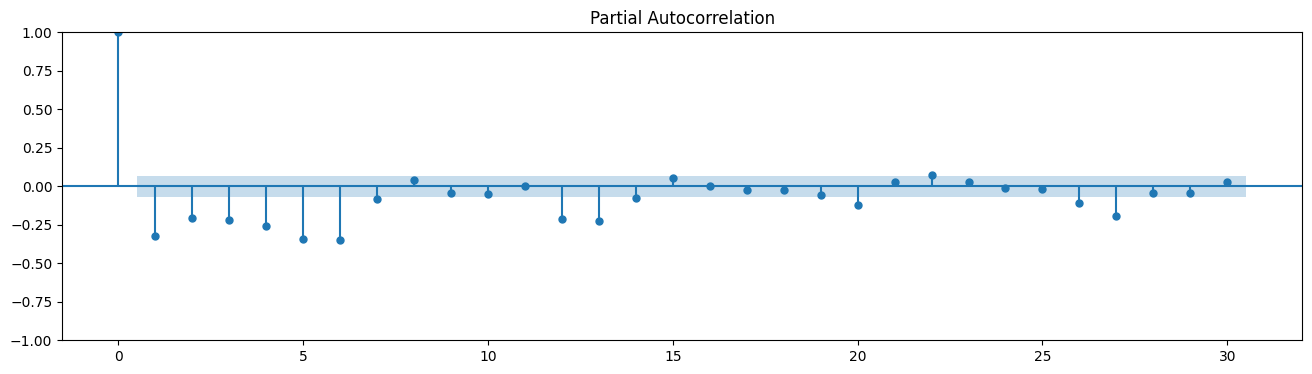

In [70]:
fig, ax = plt.subplots(1,2)
ax[0].plot(df_item1.index, df_item1.diff_sales, color='blue')
ax[0].set_title('Series 1')

ax[1].plot(df_item2.index, df_item2.diff_sales, color='red')
ax[1].set_title('Series 2')

plt.show()

adfuller_serie_1 = adfuller(df_item1.diff_sales.dropna())
adfuller_serie_2 = adfuller(df_item2.diff_sales.dropna())
print('p-value of the Augmented Dickey-Fuller Test for series 1: {0:.2f}'.format(np.round(adfuller_serie_1[1],2)))
print('p-value of the Augmented Dickey-Fuller Test for series 2: {0:.2f}'.format(np.round(adfuller_serie_2[1],2)))

plot_acf(df_item1.diff_sales.dropna(), alpha = 0.05);
plot_pacf(df_item1.diff_sales.dropna(), alpha = 0.05);

**One last point... Validation and Backtest**

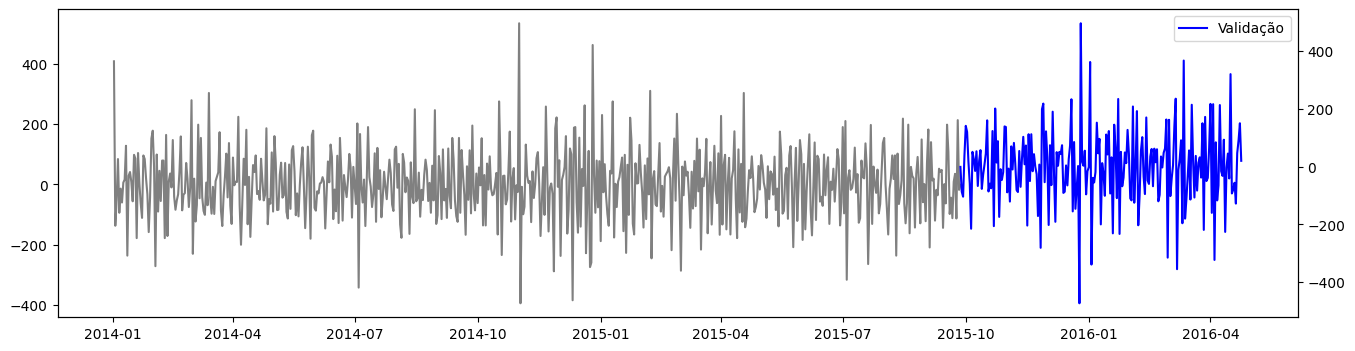

In [71]:
backtest_size = 0.75
train = df_item1.drop(['date'], axis=1).reset_index().loc[0:np.round(df_item1.shape[0]*backtest_size),:]
test = df_item1.drop(['date'], axis=1).reset_index().loc[np.round(df_item1.shape[0]*backtest_size):,:]

fig, ax = plt.subplots()
ax.plot(train.date, train.diff_sales, color='gray')
ax2 = ax.twinx()
ax2.plot(test.date, test.diff_sales, color='blue', label='Validação')
plt.legend()
plt.show()



**Anyway... Adjusting the model**

In [72]:
from statsmodels.tsa.arima_model import ARIMA

In [73]:
train.head()
train.index = train['date']

In [35]:
#mod = ARIMA(train.diff_sales.dropna(), order=(6,0,1))

#result = mod.fit()

#print(result.summary())
#print(result.params)
#predito_AR1 = result.predict(start = test.date.min(), end = test.date.max() )

NameError: name 'mod' is not defined

In [74]:
#Random Forest
df_item1.loc[:,'weekday'] = df_item1.index.dayofweek
df_item1.loc[:,'Evento_Flag'] = np.where(df_item1['event_name_1'].isna(), 0, 1)
df_item1.loc[:,'lag_diff_sales_1'] = df_item1.loc[:,'diff_sales'].diff(1)
df_item1.loc[:,'lag_diff_sales_2'] = df_item1.loc[:,'diff_sales'].diff(2)
df_item1.loc[:,'lag_diff_sales_3'] = df_item1.loc[:,'diff_sales'].diff(3)
df_item1.loc[:,'lag_diff_sales_4'] = df_item1.loc[:,'diff_sales'].diff(4)
df_item1.loc[:,'lag_diff_sales_5'] = df_item1.loc[:,'diff_sales'].diff(5)
df_item1.loc[:,'lag_diff_sales_6'] = df_item1.loc[:,'diff_sales'].diff(6)

<ipython-input-74-910af540f5c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item1.loc[:,'weekday'] = df_item1.index.dayofweek
<ipython-input-74-910af540f5c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_item1.loc[:,'Evento_Flag'] = np.where(df_item1['event_name_1'].isna(), 0, 1)
<ipython-input-74-910af540f5c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [75]:
df_item1.head()

,dept_id,state_id,cat_id,d,date,event_name_1,event_type_1,value_sales,sell_price,lag1_sales,diff_sales,weekday,Evento_Flag,lag_diff_sales_1,lag_diff_sales_2,lag_diff_sales_3,lag_diff_sales_4,lag_diff_sales_5,lag_diff_sales_6
date,,,,,,,,,,,,,,,,,,,
2014-01-01,HOBBIES_1,CA,HOBBIES,d_1069,2014-01-01,NewYear,National,294,6.333581,NaN,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,HOBBIES_1,CA,HOBBIES,d_1070,2014-01-02,NaN,NaN,702,6.333581,294.0,408.0,3,0,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,HOBBIES_1,CA,HOBBIES,d_1071,2014-01-03,NaN,NaN,565,6.333581,702.0,-137.0,4,0,-545.0,NaN,NaN,NaN,NaN,NaN
2014-01-04,HOBBIES_1,CA,HOBBIES,d_1072,2014-01-04,NaN,NaN,513,6.380265,565.0,-52.0,5,0,85.0,-460.0,NaN,NaN,NaN,NaN
2014-01-05,HOBBIES_1,CA,HOBBIES,d_1073,2014-01-05,NaN,NaN,597,6.380265,513.0,84.0,6,0,136.0,221.0,-324.0,NaN,NaN,NaN


In [76]:
train = df_item1.drop(['date'],axis=1).reset_index().loc[7:np.round(df_item1.shape[0]*backtest_size),:]
test = df_item1.drop(['date'],axis=1).reset_index().loc[np.round(df_item1.shape[0]*backtest_size):,:]

X_cols = ['sell_price', 'weekday', 'Evento_Flag', 'lag_diff_sales_1', 'lag_diff_sales_2',
          'lag_diff_sales_3', 'lag_diff_sales_4', 'lag_diff_sales_5',
          'lag_diff_sales_6']
y_col = 'diff_sales'

X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train[y_col], test[y_col]

In [77]:
#Parameterizes RF, rotates and anchors on the test base.

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=None, random_state=42, criterion = 'squared_error', verbose = 0)
rfr.fit(X_train, y_train)
print('R² da Random Forest no teste: {0:.2f}'.format(rfr.score(X_test, y_test)))
test['pred_RF'] = rfr.predict(X_test)

R² da Random Forest no teste: 0.95


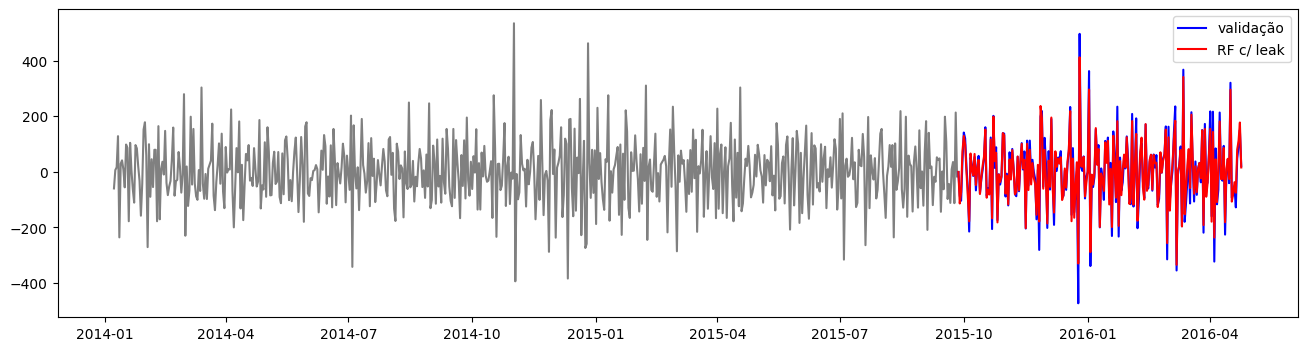

In [78]:
#Results
fig, ax = plt.subplots()
ax.plot(train.date, train.diff_sales, color='gray')
ax.plot(test.date, test.diff_sales, color='blue',label='validação')
ax.plot(test.date, test.pred_RF, color='red',label='RF c/ leak')

plt.legend()
plt.show()

In [79]:
test.head()

,date,dept_id,state_id,cat_id,d,event_name_1,event_type_1,value_sales,sell_price,lag1_sales,diff_sales,weekday,Evento_Flag,lag_diff_sales_1,lag_diff_sales_2,lag_diff_sales_3,lag_diff_sales_4,lag_diff_sales_5,lag_diff_sales_6,pred_RF
634,2015-09-27,HOBBIES_1,CA,HOBBIES,d_1703,NaN,NaN,553,6.659038,554.0,-1.0,6,0,17.0,-214.0,112.0,-36.0,-10.0,111.0,-0.55
635,2015-09-28,HOBBIES_1,CA,HOBBIES,d_1704,NaN,NaN,466,6.659038,553.0,-87.0,0,0,-86.0,-69.0,-300.0,26.0,-122.0,-96.0,-113.99
636,2015-09-29,HOBBIES_1,CA,HOBBIES,d_1705,NaN,NaN,362,6.659038,466.0,-104.0,1,0,-17.0,-103.0,-86.0,-317.0,9.0,-139.0,-73.58
637,2015-09-30,HOBBIES_1,CA,HOBBIES,d_1706,NaN,NaN,399,6.659038,362.0,37.0,2,0,141.0,124.0,38.0,55.0,-176.0,150.0,72.63
638,2015-10-01,HOBBIES_1,CA,HOBBIES,d_1707,NaN,NaN,540,6.659038,399.0,141.0,3,0,104.0,245.0,228.0,142.0,159.0,-72.0,128.56


**Adjusting Short-Term Leak to a Fair Long-Term Model**

In [80]:
#Adjust

last_7days = train[['weekday', 'lag_diff_sales_1', 'lag_diff_sales_2',
       'lag_diff_sales_3', 'lag_diff_sales_4', 'lag_diff_sales_5',
       'lag_diff_sales_6']].tail(7)

X_test_fix = X_test.drop(['lag_diff_sales_1', 'lag_diff_sales_2',
       'lag_diff_sales_3', 'lag_diff_sales_4', 'lag_diff_sales_5',
       'lag_diff_sales_6'], axis = 1)

train

test_fix = test.drop(['index','lag_diff_sales_1', 'lag_diff_sales_2',
       'lag_diff_sales_3', 'lag_diff_sales_4', 'lag_diff_sales_5',
       'lag_diff_sales_6'],axis =1).merge(last_7days, on = 'weekday', how='inner').sort_values(['date'])

X_test_fix, y_test_fix = test_fix[X_cols], test_fix[y_col]

KeyError: "['index'] not found in axis"

In [81]:
X_test_fix.sort_values(['weekday'])

,sell_price,weekday,Evento_Flag
817,6.644423,0,0
789,6.665962,0,0
838,6.643942,0,0
670,6.655144,0,0
782,6.669135,0,0
...,...,...,...
788,6.665962,6,0
795,6.644231,6,0
802,6.644423,6,0
816,6.644423,6,1


In [83]:
test['pred_RF_Fix'] = rfr.predict(X_test_fix)
test['AE_RF_Fixed'] = abs(test['pred_RF_Fix'] - test['diff_sales'])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- lag_diff_sales_1
- lag_diff_sales_2
- lag_diff_sales_3
- lag_diff_sales_4
- lag_diff_sales_5
- ...


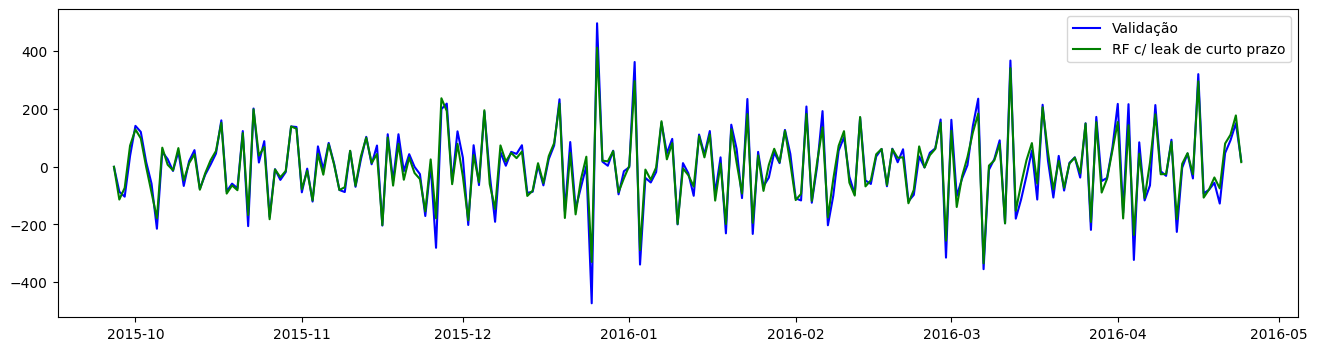

In [88]:
fig, ax = plt.subplots()
ax.plot(test.date, test.diff_sales, color = 'blue', label='Validação')
ax.plot(test.date, test.pred_RF, color='green',label='RF c/ leak de curto prazo')

plt.legend()
plt.show()